In [1]:
import matplotlib.pyplot as plt
from dysts.flows import Lorenz
from matplotlib.animation import FuncAnimation, PillowWriter
import sys
import os
import torch

sys.path.insert(0, f'{os.path.curdir}/../')
from validyna.plot import plot_1d_trajectories

In [14]:
lorenz = Lorenz()
n = 1000
traj_1 = lorenz.make_trajectory(n, resample=True, pts_per_period=100)
lorenz.ic += 0.1
traj_2 = lorenz.make_trajectory(n, resample=True, pts_per_period=100)

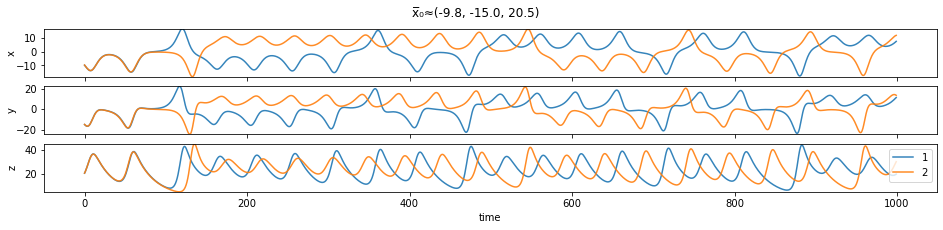

In [15]:
fig = plot_1d_trajectories([torch.Tensor(traj_1).view(1, n, -1), torch.Tensor(traj_2).view(1, n, -1)],
                           labels=['1', '2'], n_plots=1, alpha=0.9)
fig.savefig(f'{os.path.curdir}/../../Resources/Thesis/initial condition sensitivity.pdf', format='pdf', bbox_inches='tight')

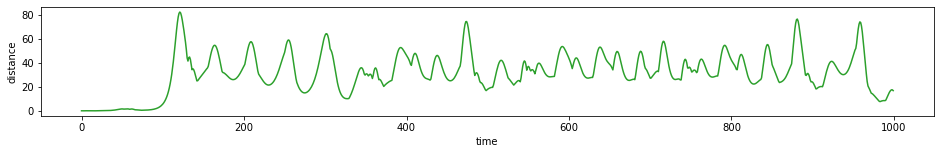

In [16]:
import numpy as np
fig, ax = plt.subplots(1, figsize=(16, 2))
ax.plot(np.sqrt(np.power(traj_1 - traj_2, 2)).sum(axis=1), color='C2')
ax.set_xlabel('time')
#ax.set_yscale('log')
ax.set_ylabel('distance')
fig.savefig(f'{os.path.curdir}/../../Resources/Thesis/initial condition distance.pdf', format='pdf', bbox_inches='tight');

KeyboardInterrupt: 

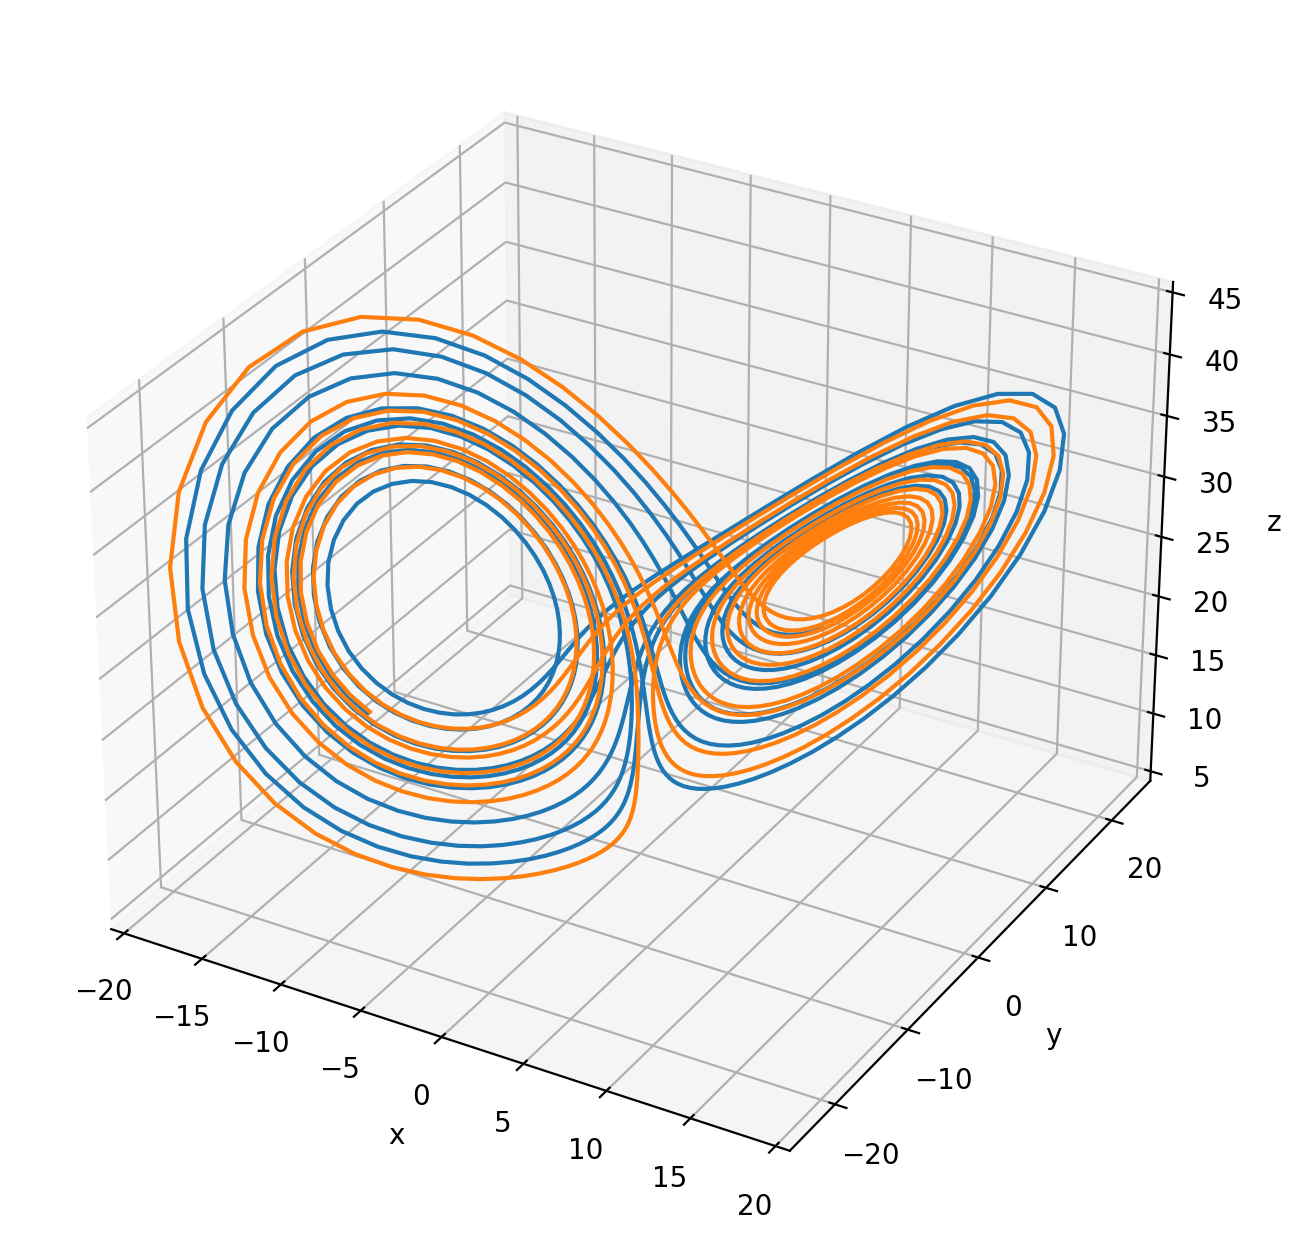

In [17]:
fig = plt.figure(figsize=(9, 8), dpi=200)
ax = plt.axes(projection ='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim([-20, 20])
ax.set_ylim([-25, 25])
ax.set_zlim([5, 45])
line_1, = ax.plot([], [], [], label='1')
line_2, = ax.plot([], [], [], label='2')

def set_data(what, data):
    what.set_data(data[:2])
    what.set_3d_properties(data[2])

def init():
    set_data(line_1, ([], [], []))
    set_data(line_2, ([], [], []))
    return line_1, line_2

def animate(i):
    set_data(line_1, traj_1[:i].T)
    set_data(line_2, traj_2[:i].T)
    return line_1, line_2

ani = FuncAnimation(fig, animate, init_func=init, interval=100, repeat=True, frames=n)
ani.save("Lorenz ic.gif", dpi=200, writer=PillowWriter(fps=25))